In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
# Importing the dataset
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
#Creating Independent Vector
X = data.iloc[:, 3:-1].values
#Creating Dependent Vector
y = data.iloc[:, -1].values

In [7]:
print("Independent Vector :: \n", X)

Independent Vector :: 
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [8]:
X.shape

(10000, 10)

In [9]:
print("Dependent Vector :: \n", y)

Dependent Vector :: 
 [1 0 1 ... 1 1 0]


In [10]:
y.shape

(10000,)

In [11]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [12]:
X[1,0:10]

array([608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

In [13]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:, 2] = label_encoder.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
coltrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(coltrans.fit_transform(X))
print(X[1,0:12])

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]


In [14]:
# using Onehotencoder we replaced country by three new column

In [15]:
print("The shape of Vector X is :: \n")
print(X.shape)

The shape of Vector X is :: 

(10000, 12)


In [16]:
X[1,0:11]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1], dtype=object)

In [17]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
stand_sc = StandardScaler()
X = stand_sc.fit_transform(X)
print(X[1,0:12])

[-1.00280393 -0.57873591  1.74273971 -0.44003595 -1.09598752  0.19816383
 -1.38753759  0.11735002 -0.91158349 -1.54776799  0.97024255  0.21653375]


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score

In [21]:
svc_df=SVC()
svc_df.fit(X_train,y_train)
y_pred = svc_df.predict(X_test)

In [22]:
for i in range(0, y_pred.size):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1551   44]
 [ 225  180]]


In [24]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
report = classification_report(y_test, y_pred)
print("The Classification report is as follows::\n", report)

The Classification report is as follows::
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.80      0.44      0.57       405

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



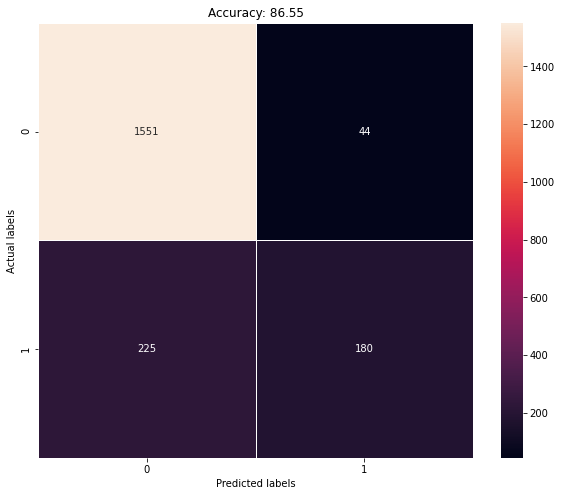

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = '.0f', linewidths = .5, square = True)
plt.xlabel('Predicted labels')
plt.title('Accuracy: {0}'.format(round(accuracy, 2)))
plt.ylabel('Actual labels')
plt.show()